In [52]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs()

k = 3
kmean = KMeans(n_clusters=k, random_state=42)
y_pred = kmean.fit_predict(X)

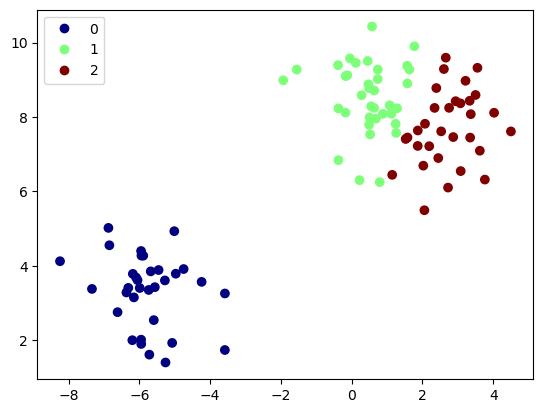

In [53]:
import matplotlib.pyplot as plt
scatter = plt.scatter(X[:, 0], X[:, 1], cmap='jet', c=y_pred)
plt.legend(*scatter.legend_elements(), loc="upper left")
plt.show()

In [54]:
print(y_pred)
y_pred is kmean.labels_

[0 1 0 0 2 2 2 0 0 2 1 1 2 2 1 0 0 2 2 1 0 2 0 2 1 0 2 1 0 0 1 2 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 2 0 0 1 0 1 2 1 0 2 0 2 2 1 1 0 2 1 1 0 2
 0 2 1 0 1 0 2 1 2 2 2 2 1 2 1 1 0 2 1 0 2 2 1 2 2 1]


True

In [55]:
kmean.cluster_centers_

array([[-5.77039519,  3.33226916],
       [ 0.4763577 ,  8.53300001],
       [ 2.74002004,  7.70814103]])

In [56]:
X_new = np.array([[0, 2], [3,2], [-3,-3], [-10,-2.5]])
kmean.predict(X_new)

array([0, 2, 0, 0])

In [57]:
kmean.transform(X_new).round(2)

array([[ 5.92,  6.55,  6.33],
       [ 8.87,  7.  ,  5.71],
       [ 6.91, 12.05, 12.15],
       [ 7.2 , 15.21, 16.33]])

## Kmeans decision making ##

Kmeans creates centroids based on number of centers given and then based of the point and the distance it is from a centroid it makes the "classification"

In [58]:
kmean.inertia_

159.39146725605917

c:\Users\travi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


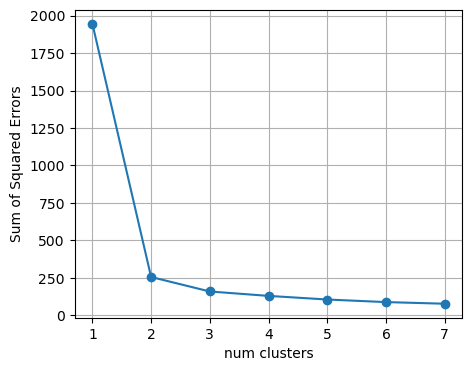

In [59]:
errors = []

for i in range(1,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(num_cluster_checker.inertia_)

plt.figure(figsize=(5,4))    
plt.plot(range(1,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Sum of Squared Errors")
plt.grid(True)
plt.show()

In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmean.labels_)

0.5437324527838195

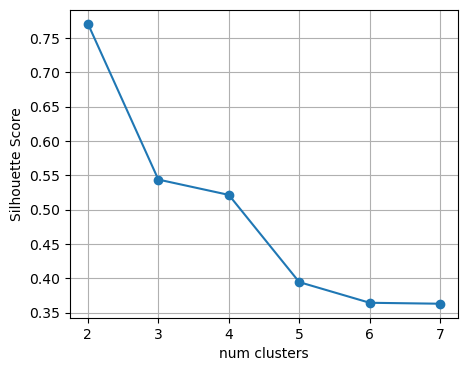

In [61]:
errors = []

for i in range(2,8):
    num_cluster_checker = KMeans(n_clusters=i)
    
    num_cluster_checker.fit(X)
    
    errors.append(silhouette_score(X, num_cluster_checker.labels_))

plt.figure(figsize=(5,4))    
plt.plot(range(2,8), errors, marker='o')
plt.xlabel("num clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [62]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [63]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [64]:
import PIL
image = np.asarray(PIL.Image.open(filepath))

In [65]:
image.shape

(533, 800, 3)

(-0.5, 799.5, 532.5, -0.5)

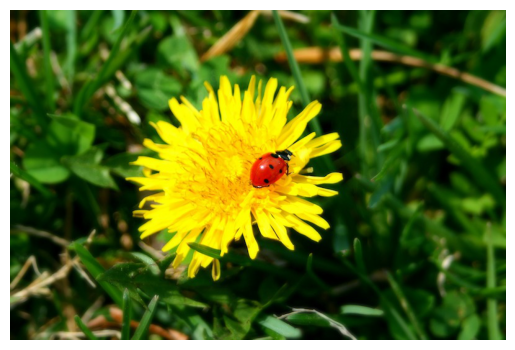

In [66]:
plt.imshow(image.astype('uint8'))
plt.axis("off")

In [67]:
XD = image.reshape(-1,3)

In [68]:
X = image.reshape(-1, 3)
kmean = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmean.cluster_centers_[kmean.labels_]
segmented_img = segmented_img.reshape(image.shape)

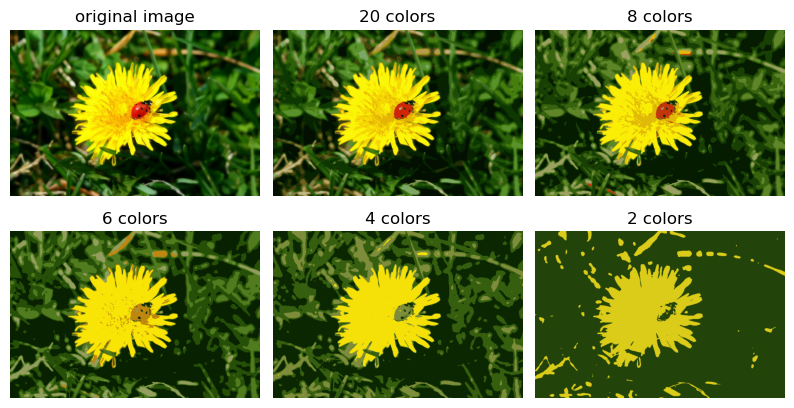

In [69]:
segmented_imgs = []
n_colors = [2,4,6,8,20]
n_colors.reverse()
for n_clusters in n_colors:
    kmean = KMeans(n_clusters, random_state=42).fit(X)
    segmented_img = kmean.cluster_centers_[kmean.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.1, wspace=0.05)

plt.subplot(2,3,1)
plt.title("original image")
plt.imshow(image)
plt.axis('off')

for indx, number_of_color in enumerate(n_colors):
    plt.subplot(2, 3, 2 + indx)
    plt.imshow(segmented_imgs[indx].astype("uint8"))
    plt.title(f"{number_of_color} colors")
    plt.axis('off')
plt.show()

In [70]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [71]:
from sklearn.linear_model import LogisticRegression
n_labled= 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:50],y_train[:50])

LogisticRegression(max_iter=10000)

In [72]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [73]:
k = 50
kmean = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmean.fit_transform(X_train)
representitive_digit_indx = np.argmin(X_digits_dist, axis=0)
X_representitve_digits = X_train[representitive_digit_indx]

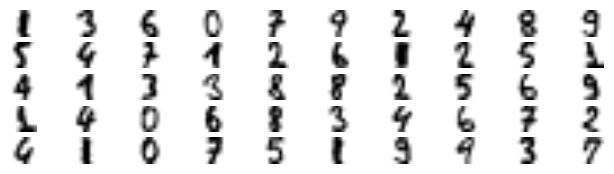

In [74]:
plt.figure(figsize=(8, 2))
for indx, image in enumerate(X_representitve_digits):
    plt.subplot(50// 10, 10, indx+1)
    plt.imshow(image.reshape(8,8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [75]:
y_representative_digits = [1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 
                           5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 
                           4, 1, 3, 3, 8, 8, 2, 5, 6, 9, 
                           1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 
                           4, 1, 0, 7, 5, 1, 9, 9, 3, 7]
len(y_representative_digits)

50

In [76]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representitve_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [77]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k): #k is the number of labels we are using in this case it is 50
    y_train_propagated[kmean.labels_ == i] = y_representative_digits[i] #We do this to go from labels 0-49 to 0-9 to 'label' all the X_train

In [78]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8967254408060453

In [79]:
percentile_99 = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmean.labels_] 
for i in range(k):
    in_cluster = (kmean.labels_ == i)
    cluster_i_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_i_dist, percentile_99)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    #print(np.unique((in_cluster & above_cutoff), return_counts=True))
    X_cluster_dist[in_cluster & above_cutoff] = -1 #finds the outliers

partially_propogagated = (X_cluster_dist != -1)
X_train_partially_propogated = X_train[partially_propogagated]
y_train_partially_propogated = y_train_propagated[partially_propogagated]

In [80]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propogated, y_train_partially_propogated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [81]:
(y_train_partially_propogated == y_train[partially_propogagated]).mean() #checking how right we are about the new labels

0.9755555555555555

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1_000, noise=0.05)
dbscan = DBSCAN(min_samples=5, eps=0.05)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [83]:
dbscan.labels_[:100]

array([ 0,  3,  1,  2,  1, -1,  2,  2,  3,  7,  4,  5,  5,  5,  5,  3,  6,
        2,  5,  5,  7,  2,  2,  2,  3,  3,  3,  2,  6, -1,  2, -1,  6,  5,
        3,  3,  6,  6,  4,  4,  0,  4,  5,  5,  7,  0,  4, -1,  3,  7, -1,
        3,  2,  2,  1,  4,  2,  5,  2,  8,  5,  0,  1,  9,  5, -1,  4,  5,
        5, 10,  0,  5,  2,  9, -1,  5,  3, -1,  5,  5,  4,  6,  8,  2,  1,
       -1,  8,  4,  5,  6,  7,  6,  5,  5,  4,  6,  2, -1,  5,  2],
      dtype=int64)

In [84]:
print(len(dbscan.labels_))
print(len(dbscan.components_))

1000
799


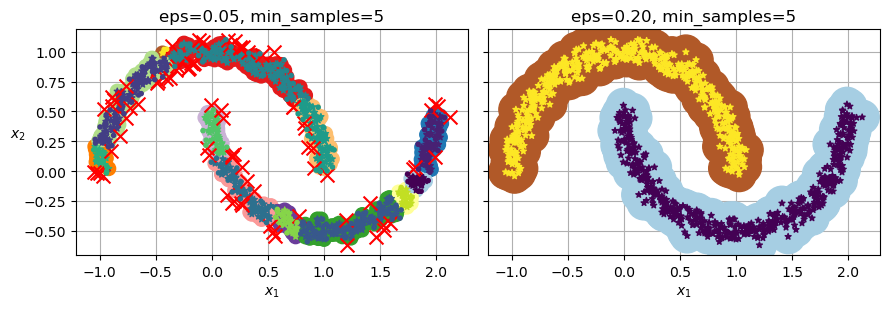

In [85]:

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [86]:
dbscan = dbscan2

In [87]:
from sklearn.neighbors import KNeighborsClassifier
#dbscan does not have a predict method so we are using KNN to do it
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [88]:
X_new = np.array([[-0.5, 0], [0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0], dtype=int64)

In [89]:
knn.predict_proba(X_new)

array([[0.12, 0.88],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

In [90]:
y_dist, y_pred_indx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_indx]
y_pred[y_dist> 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

In [91]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [92]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [93]:
gm.weights_

array([0.40008431, 0.20970929, 0.3902064 ])

In [94]:
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.017, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [95]:
print(gm.converged_)
print(gm.n_iter_)

True
4


In [96]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.4547714 ,  1.81130119],
       [ 5.18803253,  1.60510214],
       [ 3.91503767,  0.8181806 ],
       [ 0.37365458,  0.93657634],
       [ 0.99122019,  1.9370935 ],
       [ 0.51109753, -0.68309274]])

In [97]:
y_new

array([0, 1, 1, 2, 2, 2])

In [98]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

In [99]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

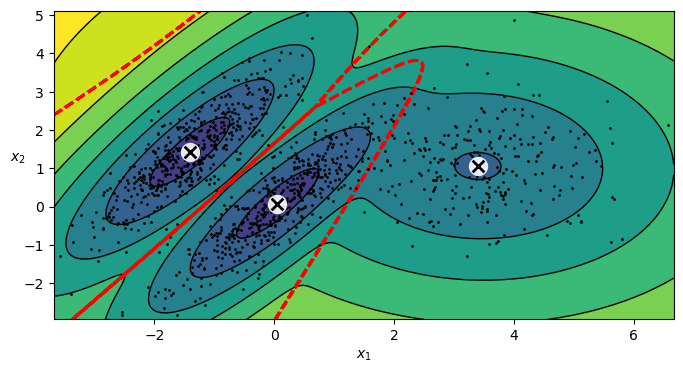

In [100]:
from matplotlib.colors import LogNorm

def plot_gaussian_mix(Clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    Z = -Clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0,2,12))
    
    plt.contour(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0,2,12),
                 linewidths=1, colors='k')
    
    Z = Clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(Clusterer.means_, Clusterer.weights_)
    
    plt.xlabel('$x_1$')
    
    if show_ylabels:
        plt.ylabel('$x_2$', rotation=0)
    
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8,4))

plot_gaussian_mix(gm, X)

plt.show()